# Neural Network Classification Examples

이번 실습에서는 TensorFlow를 활용하여 **Binary Classification, Multi-class Classification, Multi-label Classification** 
문제를 각각 해결하는 신경망 모델을 만들어봅니다.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification, load_iris, make_multilabel_classification

## 1. Binary Classification
- 데이터: sklearn `make_classification`
- 출력: sigmoid activation

### 출력 형태 설명
- **출력층**: `Dense(1, activation='sigmoid')` - 1개의 뉴런
- **출력 값 범위**: 0 ~ 1 사이의 확률 값
- **타겟 형태**: `[1 0 1 1 0]` - 0 또는 1의 정수 값
- **손실 함수**: `binary_crossentropy` - 이진 분류에 적합한 손실 함수
- **해석**: 
  - 출력 값이 0.5 이상이면 클래스 1로 예측
  - 출력 값이 0.5 미만이면 클래스 0으로 예측
- **예시**: 
  - 출력이 0.8이면 → 클래스 1 (80% 확률)
  - 출력이 0.3이면 → 클래스 0 (30% 확률)

[1 0 1 1 0]


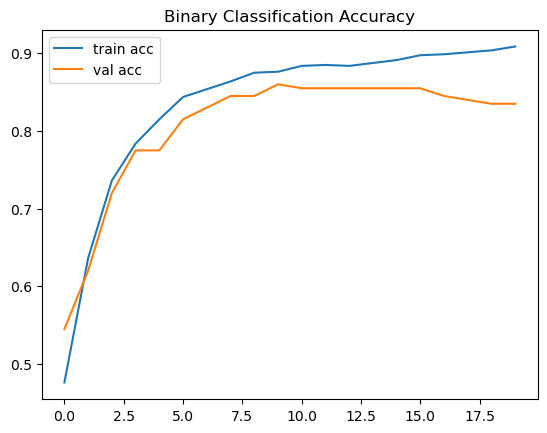

In [7]:
X_bin, y_bin = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_bin, y_bin, test_size=0.2, random_state=42)

print(y_bin[0:5])

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model_bin = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_bin.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_bin = model_bin.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32, verbose=0)

plt.plot(history_bin.history['accuracy'], label='train acc')
plt.plot(history_bin.history['val_accuracy'], label='val acc')
plt.title('Binary Classification Accuracy')
plt.legend()
plt.show()

## 2. Multi-class Classification
- 데이터: Iris Dataset
- 출력: softmax activation

### 출력 형태 설명
- **출력층**: `Dense(3, activation='softmax')` - 3개의 뉴런 (클래스 개수만큼)
- **출력 값 범위**: 각 클래스에 대한 확률 값 (모든 확률의 합 = 1)
- **타겟 형태**: `[[1. 0. 0.] [1. 0. 0.] [0. 1. 0.] ...]` - one-hot encoding (각 샘플마다 하나의 클래스만 1)
- **손실 함수**: `categorical_crossentropy` - 다중 클래스 분류에 적합한 손실 함수
- **해석**: 
  - 각 출력 뉴런이 해당 클래스의 확률을 나타냄
  - 가장 높은 확률을 가진 클래스를 선택하여 예측
- **예시**: 
  - 출력이 `[0.1, 0.8, 0.1]`이면 → 클래스 1로 예측 (80% 확률)
  - 출력이 `[0.7, 0.2, 0.1]`이면 → 클래스 0으로 예측 (70% 확률)
- **특징**: 
  - softmax는 모든 출력의 합이 1이 되도록 정규화
  - 여러 클래스 중 하나만 선택하는 문제에 사용

[[1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


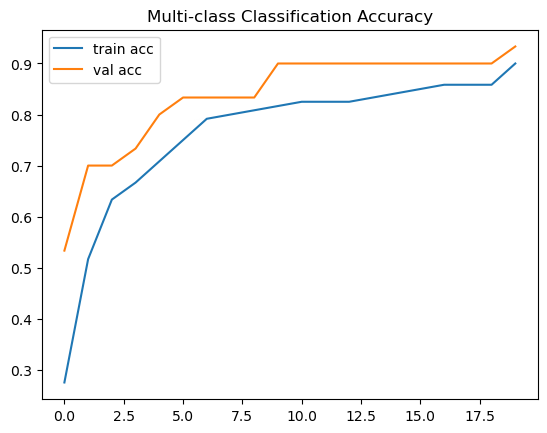

In [11]:
iris = load_iris()
X_multi, y_multi = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

y_train = to_categorical(y_train, 3)
y_test = to_categorical(y_test, 3)
print(y_train[0:5])

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model_multi = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model_multi.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_multi = model_multi.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=16, verbose=0)

plt.plot(history_multi.history['accuracy'], label='train acc')
plt.plot(history_multi.history['val_accuracy'], label='val acc')
plt.title('Multi-class Classification Accuracy')
plt.legend()
plt.show()

## 3. Multi-label Classification
- 데이터: sklearn `make_multilabel_classification`
- 출력: sigmoid activation (각 라벨 독립적)

### 출력 형태 설명
- **출력층**: `Dense(y_train.shape[1], activation='sigmoid')` - 라벨 개수만큼의 뉴런 (여기서는 5개)
- **출력 값 범위**: 각 라벨마다 0 ~ 1 사이의 독립적인 확률 값
- **타겟 형태**: `[[0 0 0 1 0] [1 1 1 0 0] ...]` - 각 샘플이 여러 라벨을 가질 수 있음 (0 또는 1의 조합)
- **손실 함수**: `binary_crossentropy` - 각 라벨을 독립적으로 이진 분류로 처리
- **해석**: 
  - 각 출력 뉴런이 해당 라벨의 존재 여부를 독립적으로 예측
  - 일반적으로 0.5 이상이면 해당 라벨이 있다고 예측
  - 하나의 샘플이 여러 라벨을 동시에 가질 수 있음
- **예시**: 
  - 출력이 `[0.9, 0.2, 0.7, 0.1, 0.8]`이면 → 라벨 0, 2, 4가 있다고 예측
  - 출력이 `[0.3, 0.1, 0.2, 0.9, 0.1]`이면 → 라벨 3만 있다고 예측
- **특징**: 
  - 각 라벨이 독립적이므로 출력의 합이 1일 필요 없음
  - 하나의 샘플이 여러 클래스를 동시에 가질 수 있는 문제에 사용
  - 예: 이미지에 여러 태그 붙이기, 문서에 여러 주제 분류하기

[[0 0 0 1 0]
 [1 1 1 0 0]
 [0 0 1 1 0]
 [1 0 0 0 0]
 [1 0 1 0 0]]


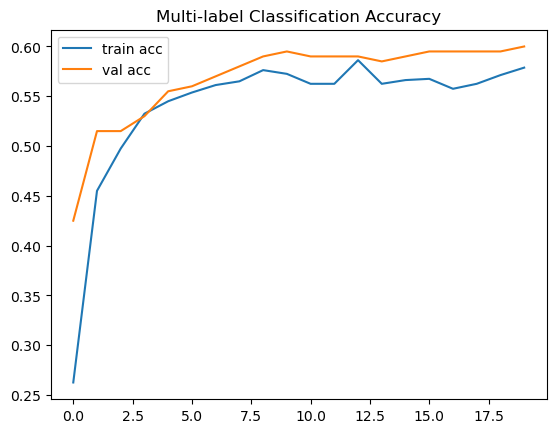

In [9]:
X_mlabel, y_mlabel = make_multilabel_classification(n_samples=1000, n_features=20, n_classes=5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_mlabel, y_mlabel, test_size=0.2, random_state=42)

print(y_mlabel[0:5])

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model_mlabel = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(y_train.shape[1], activation='sigmoid')
])

model_mlabel.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_mlabel = model_mlabel.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32, verbose=0)

plt.plot(history_mlabel.history['accuracy'], label='train acc')
plt.plot(history_mlabel.history['val_accuracy'], label='val acc')
plt.title('Multi-label Classification Accuracy')
plt.legend()
plt.show()